# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 12 - Exercise
# K Nearest Neighbours

![image.png](attachment:image.png)

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler 

# Part A - KNN for Classification

# 1. Data Manipulation with pandas

In [ ]:
iris = datasets.load_iris()
print(iris.keys)

<built-in method keys of Bunch object at 0x7f2fbdb667d0>


In [ ]:
idf = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [ ]:
idf


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

# 2. EDA


1. Create correlation matrix and plot it using heatmap
2. Use petel length and petel witdth to check distribution of your data (Scatter plot)

Note: Use seaborn

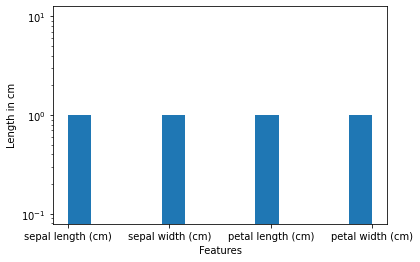

In [ ]:
x = iris.feature_names
plt.hist(x,bins=13,log=True)
plt.xlabel("Features")
plt.ylabel("Length in cm")
plt.show()

# 3. Split data into traning and test set

Note: Make sure that your train and test split will have equal number of data from each class

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(iris.data,iris.target,test_size = 0.2,random_state=5,shuffle=True,stratify=iris.target)

In [ ]:
ytest

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 1])

# 4. Training Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

# 5. Model Evaluation

1. Check train and test score
2. Display number of truely predicted sample in each class (Confusion matrix)

In [ ]:
knn.score(xtrain,ytrain)

0.9666666666666667

In [ ]:
knn.score(xtest,ytest)

0.9666666666666667

In [ ]:
ypred = knn.predict(xtest)
ypred

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 1])

In [ ]:
ytest

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ytest,ypred)
matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

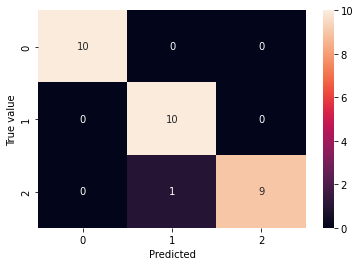

In [ ]:
sns.heatmap(data=matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

In [ ]:
knn.predict_proba(xtest)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

# 6. Chosing best k

1. Plot train and test score for k values ranging from 1 to 50

In [ ]:
trainscore=[]
testscore=[]
for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  trainscore.append(knn.score(xtrain,ytrain))
  testscore.append(knn.score(xtest,ytest))


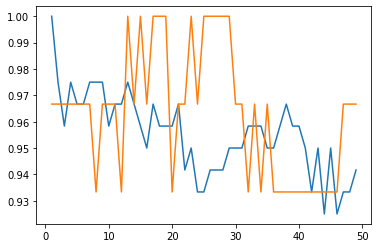

In [ ]:
plt.plot(np.arange(1,50),trainscore)
plt.plot(np.arange(1,50),testscore)
plt.show()

# Part B - KNN for Regression

Use boston data to implement KNN in Regression.

Note: Experiment affect of feature scaling.

In [ ]:
boston = datasets.load_boston()
print(boston.keys)

<built-in method keys of Bunch object at 0x7f2fb9b10d10>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
bdf = pd.DataFrame(data=boston.data,columns=boston.feature_names)
bdf

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [ ]:
x = boston.data
y = boston.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [ ]:
linearmodel = LinearRegression() 
linearmodel.fit(x_train,y_train)
y_pred = linearmodel.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
MSE

20.869292183770906

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=6)
knnr.fit(x_train,y_train)
y_pred = knnr.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
MSE

34.27619825708061

In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled,y,test_size = 0.2,random_state = 5)

In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(x_test)
MSE = mean_squared_error(ytest,y_pred)
MSE

34.27619825708061

In [ ]:
knnrg = KNeighborsRegressor(n_neighbors=6)
knnrg.fit(xtrain,ytrain)
y_pred = knnrg.predict(xtest)
MSE = mean_squared_error(ytest,y_pred)
MSE

16.703899782135075

In [ ]:
knnrg.score(xtest,ytest)

0.7866512402751126

In [ ]:
MSEtrainscore=[]
MSEtestscore=[]
for k in range(1,50):
  knnrg = KNeighborsRegressor(n_neighbors=k)
  knnrg.fit(xtrain,ytrain)
  y_pred_train = knnrg.predict(xtrain)
  y_pred_test = knnrg.predict(xtest)
  MSEtrainscore.append(mean_squared_error(ytrain,y_pred_train))
  MSEtestscore.append(mean_squared_error(ytest,y_pred_test))

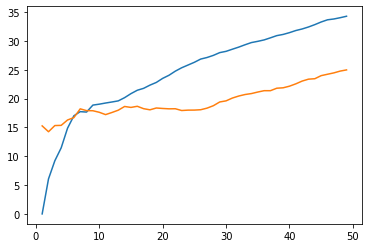

In [ ]:
plt.plot(np.arange(1,50),MSEtrainscore)
plt.plot(np.arange(1,50),MSEtestscore)
plt.show()

# Conclusion